<br>

#### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

<br>

#### Reading in Data

In [2]:
df_EI = pd.read_csv('data/EI.csv')

df_EI['local_datetime'] = pd.DatetimeIndex(pd.to_datetime(df_EI['local_datetime'], utc=True)).tz_convert('Europe/London')
df_EI = df_EI.set_index('local_datetime')
df_EI = df_EI.drop_duplicates()

df_EI.head()

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,74.74,-0.6,21278.0,555.0,6.973,0.0,17.650,...,38.329,-0.404,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.161
2009-01-01 00:30:00+00:00,56.33,2,74.89,74.89,-0.6,21442.0,558.0,6.968,0.0,17.770,...,38.461,-0.527,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.160
2009-01-01 01:00:00+00:00,52.98,3,76.41,76.41,-0.6,21614.0,569.0,6.970,0.0,18.070,...,37.986,-1.018,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.160
2009-01-01 01:30:00+00:00,50.39,4,37.73,37.73,-0.6,21320.0,578.0,6.969,0.0,18.022,...,36.864,-1.269,NaN,NaN,0.0,0.0,1.746,0.0,0.0,-0.160
2009-01-01 02:00:00+00:00,48.70,5,59.00,59.00,-0.6,21160.0,585.0,6.960,0.0,17.998,...,36.180,-1.566,NaN,NaN,0.0,0.0,1.730,0.0,0.0,-0.160


<br>

#### Demand Load Curve

In [4]:
s_demand = df_EI['demand']

s_demand.head()

local_datetime
2009-01-01 00:00:00+00:00    38.329
2009-01-01 00:30:00+00:00    38.461
2009-01-01 01:00:00+00:00    37.986
2009-01-01 01:30:00+00:00    36.864
2009-01-01 02:00:00+00:00    36.180
Name: demand, dtype: float64

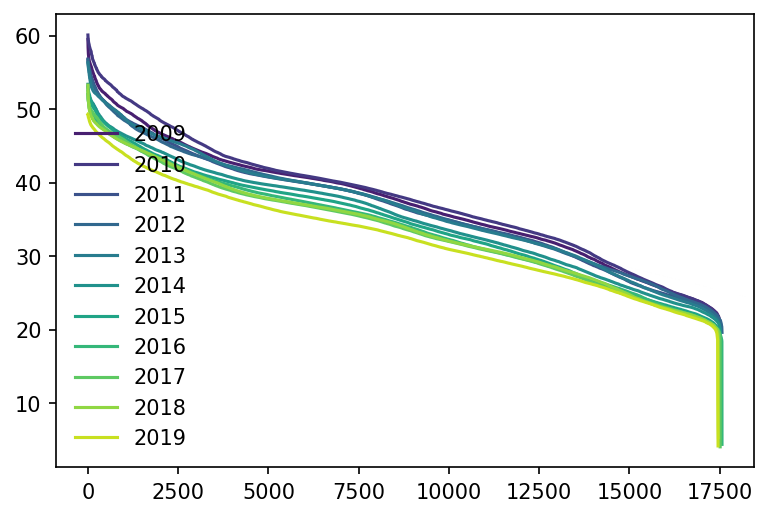

In [5]:
def sort_series(s, year):
    s_sorted = (s
                .copy()
                [str(year)]
                .sort_values(ascending=False)
                .reset_index(drop=True)
               )
    return s_sorted

years = list(range(2009, 2020))

color_list = sns.color_palette("viridis", len(years))
cmap = dict(zip(years, color_list))

plt.figure(dpi=150)

for year in years:
    s_sorted_demand = sort_series(s_demand, year)
    plt.plot(s_sorted_demand, label=f'{year}', color=cmap[year])
    
plt.legend(frameon=False)

<br>

Should look into doing load duration curves for individual generators - http://energynumbers.info/uk-offshore-wind-capacity-factors

<br>

<br>

#### Plotting Individual Fuel Load Curves

In [6]:
fuels = ['coal', 'gas', 'nuclear', 'hydro', 'pumped_storage', 'solar', 'wind']
df_EI.columns

Index(['day_ahead_price', 'SP', 'imbalance_price', 'valueSum', 'temperature',
       'TCO2_per_h', 'gCO2_per_kWh', 'nuclear', 'biomass', 'coal', 'gas',
       'hydro', 'wind', 'solar', 'demand', 'pumped_storage', 'windOnshore',
       'windOffshore', 'belgian', 'dutch', 'french', 'ireland',
       'northern_ireland', 'irish'],
      dtype='object')

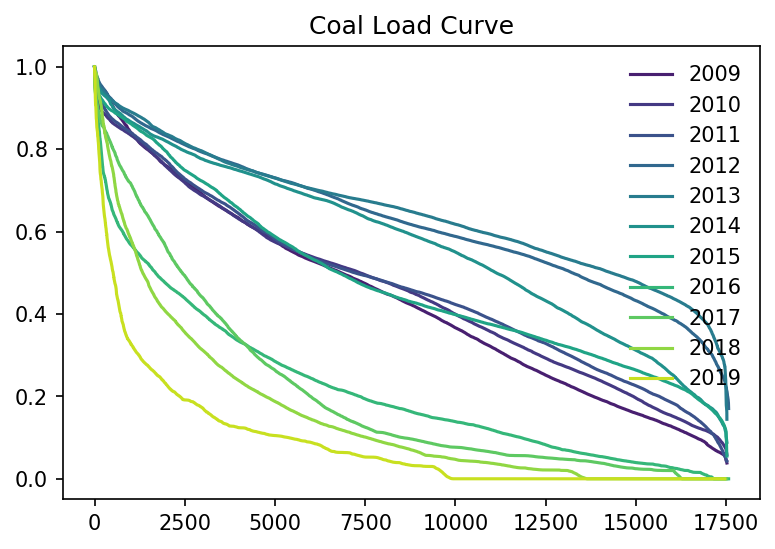

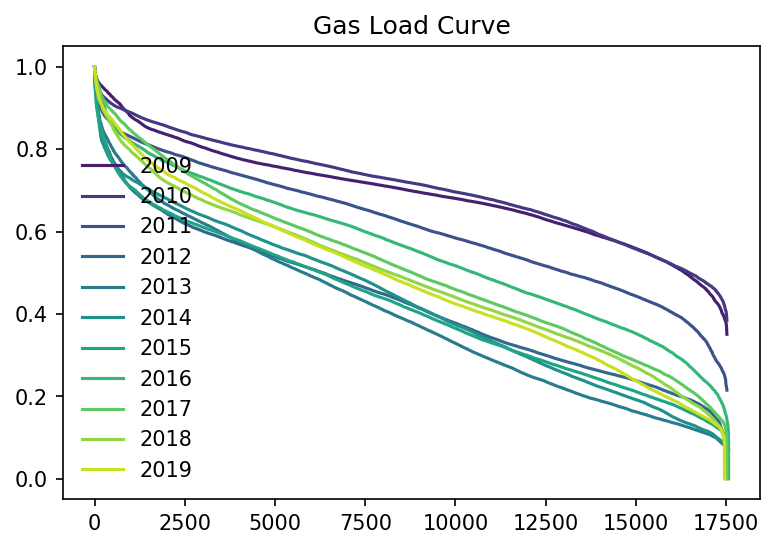

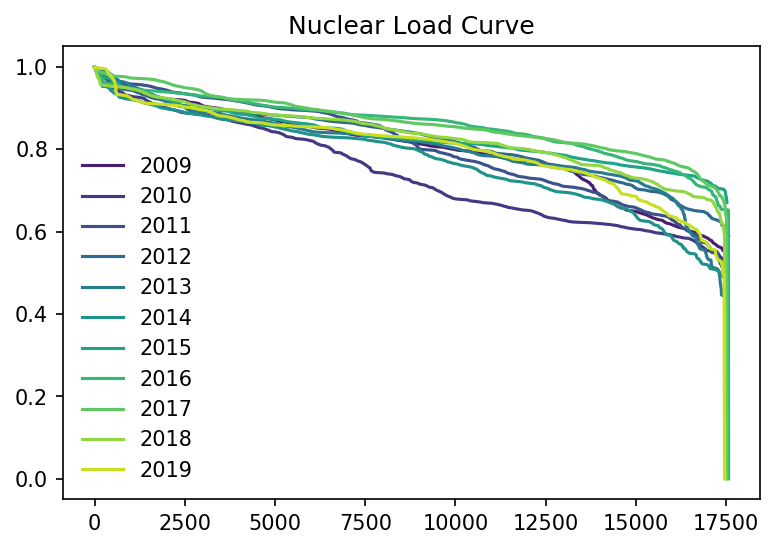

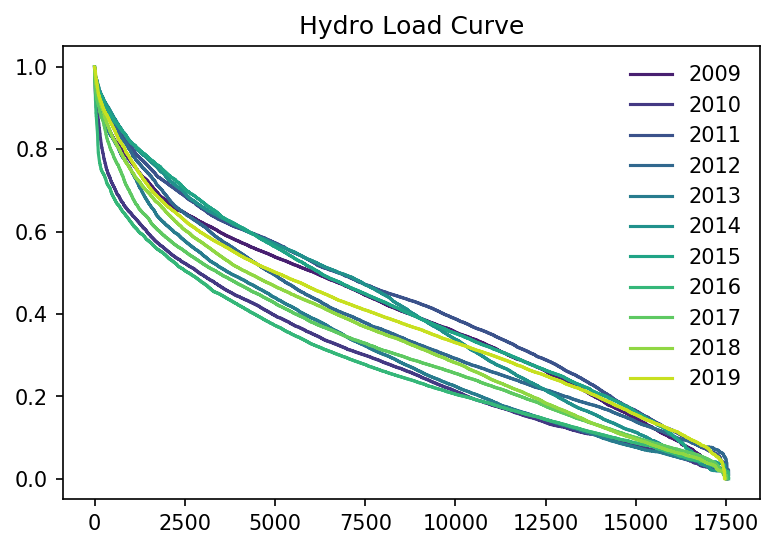

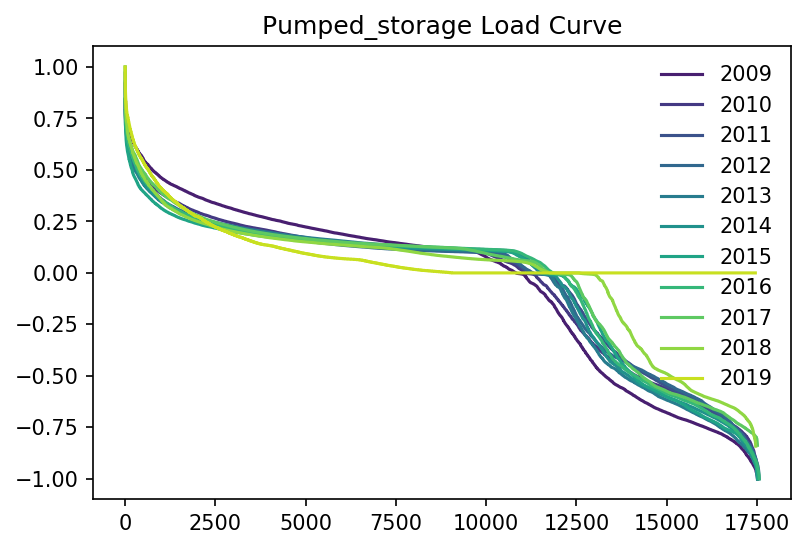

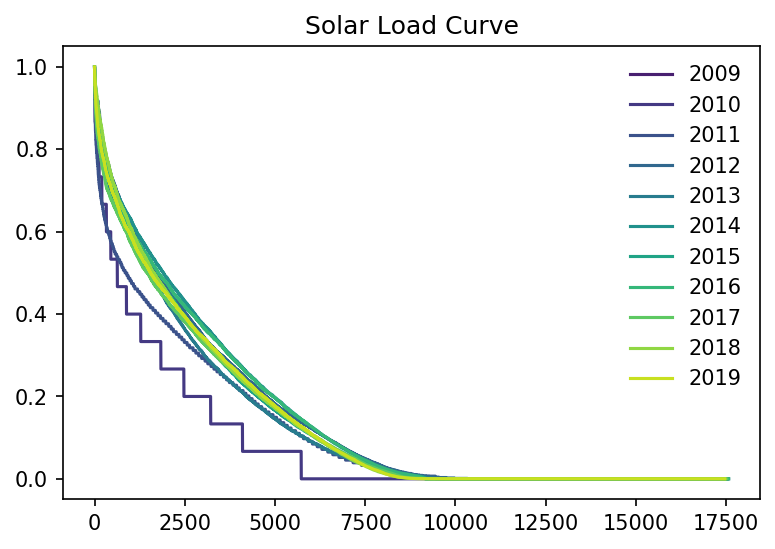

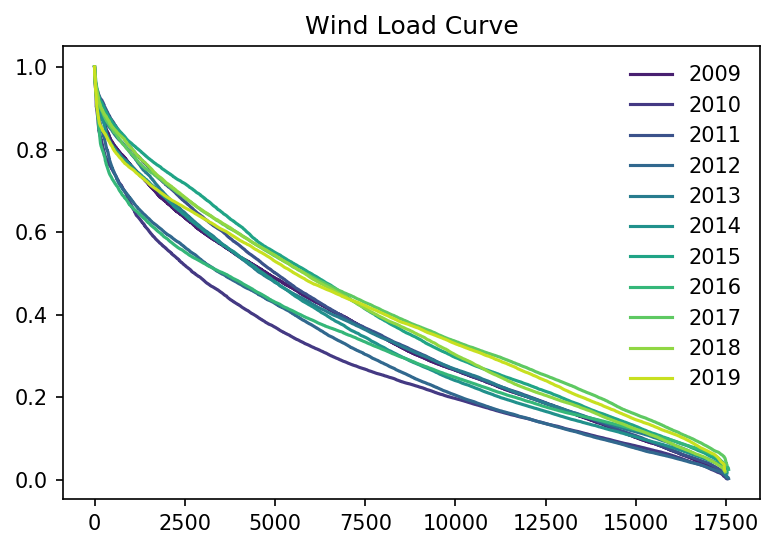

In [10]:
def plot_fuel(fuel, df_energy, normalise=False):
    plt.figure(dpi=150)
    
    for year in years:
        s_fuel = df_EI[fuel]
        s_sorted_fuel = sort_series(s_fuel, year)
        
        if normalise == True:
            s_sorted_fuel = s_sorted_fuel/s_sorted_fuel.abs().max()
        
        plt.plot(s_sorted_fuel, label=f'{year}', color=cmap[year])

    plt.legend(frameon=False)
    plt.title(f'{fuel.capitalize()} Load Curve')

for fuel in fuels:
    plot_fuel(fuel, df_EI, normalise=True)

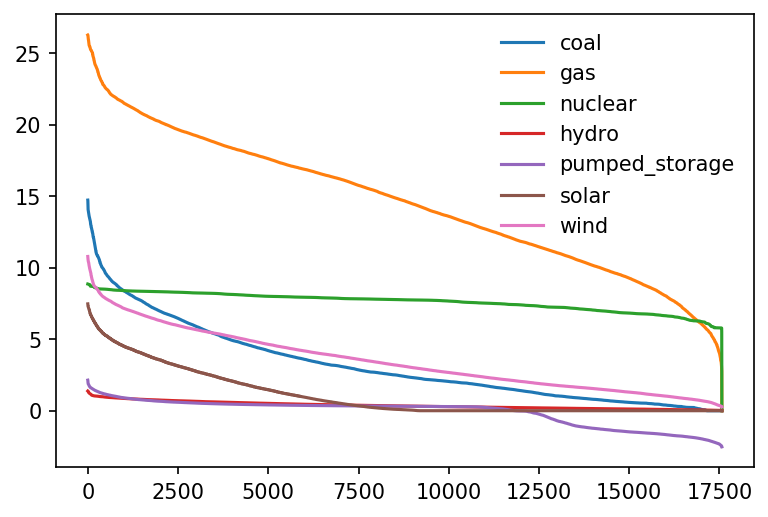

In [9]:
## Create a colormap for year fuel type, have the earlier year as a dashed line
## Could also plot this as percentage of capacity. Plot gif for last few years comparing coal and wind
## Gas is also interesting because you can see an increase in peaking

plt.figure(dpi=150)

for fuel in fuels:
    s_fuel = df_EI[fuel]
    ## colour = 
    
    for year in [2016]:#, 2017]:
        s_sorted_fuel = sort_series(s_fuel, year)
        plt.plot(s_sorted_fuel, label=f'{fuel}')
    
plt.legend(frameon=False)